# DSIM - Project
## Image Retrieval

#### Università degli studi Milano-Bicocca

Federico Luzzi - 816753

Federico De Servi - 812166

### Load libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications import mobilenet_v2, ResNet50, resnet50, InceptionV3, inception_v3
from tensorflow.keras.applications import resnet
keras.__version__

'2.2.4-tf'

Load image data

In [2]:
import zipfile, os
# this would take very long !!!
if ("images_animals10_small" not in os.listdir(".")):
    zip = zipfile.ZipFile(f'images_animals10_small.zip')
    zip.extractall()
    zip.close()

In [3]:
if ("images10_dipinti" not in os.listdir(".")):
    zip = zipfile.ZipFile(f'images10_dipinti.zip')
    zip.extractall()
    zip.close()

### Import networks

In [4]:
# load mobilenet_v2
my_mobilenet_v2 = mobilenet_v2.MobileNetV2(include_top=False, weights = 'imagenet', 
                               pooling = 'avg', input_shape=(224, 224, 3))

In [5]:
# load resnet50
my_resnet50 = ResNet50(include_top = False, weights='imagenet',
                       pooling = 'max', input_shape=(224,224,3))

In [6]:
# load inceptionv3
my_inceptionv3 = InceptionV3(include_top = False, weights='imagenet',
                       pooling = 'avg', input_shape=(224,224,3))

87916544/87910968 [==============================] - 162s 2us/step


In [7]:
# load resnet101
my_resnet = resnet.ResNet101(include_top = False, weights='imagenet',
                       pooling = 'avg', input_shape=(224,224,3))

### Preprocessing functions

In [8]:
def mobilenet_v2_features(img, net):
    '''
      Takes an image in order to extract the features of mobilenet_v2
      @params:
        - img: image to compute
        - net: neural network to use
    '''
    x = kimage.img_to_array(img) # to numpy
    x = mobilenet_v2.preprocess_input(x) # preprocess for network
    x = np.expand_dims(x, axis=0) # necessario per la rete
    features = net.predict(x).flatten()
    return features

In [9]:
def resnet50_features(img, net):
    '''
      Takes an image in order to extract the features of resnet50
      @params:
        - img: image to compute
        - net: neural network to use
    '''
    x = kimage.img_to_array(img) # to numpy
    x = resnet50.preprocess_input(x) # preprocess for network
    x = np.expand_dims(x, axis=0) # necessario per la rete
    features = net.predict(x).flatten()
    return features

In [10]:
def inception_v3_features(img, net):
    '''
      Takes an image in order to extract the features of inception_v3
      @params:
        - img: image to compute
        - net: neural network to use
    '''
    x = kimage.img_to_array(img) # to numpy
    x = inception_v3.preprocess_input(x) # preprocess for network
    x = np.expand_dims(x, axis=0) # necessario per la rete
    features = net.predict(x).flatten()
    return features

In [11]:
def resnet_features(img, net):
    '''
      Takes an image in order to extract the features of resnet50
      @params:
        - img: image to compute
        - net: neural network to use
    '''
    x = kimage.img_to_array(img) # to numpy
    x = resnet.preprocess_input(x) # preprocess for network
    x = np.expand_dims(x, axis=0) # necessario per la rete
    features = net.predict(x).flatten()
    return features

### Function to load data

In [12]:
classes = ["buffalo", "moose", "deer", "horse", "otter", "sheep", "chimpanzee",
           "lion", "raccoon", "fox"]

# Data loader
def load_data(base_path, net, feature_extractor=resnet_features):
    '''
      Load image database features by applying feature extraction of a neural network
      @params:
        - base_path: path where folders of classes of images are stored
        - feature_extractor: function that extracts features on a image
        - preprocess_fuction: function to apply to image in order to insert it 
              in the neural network
        - net: neural network to apply
    '''
    paths = []
    features = []

    for fold in classes:
        cur_fold = base_path + fold + '/'
        for file_n, f in enumerate(sorted(os.listdir(cur_fold))):
            if f.endswith('.jpg'):
                # Save file path
                cur_path = cur_fold + f
                paths.append(cur_path)

                # Load file and extract features
                image = kimage.load_img(cur_path, target_size=(224, 224, 3))
                cur_features = feature_extractor(image, net)
                features.append(cur_features)

        print(f"{fold} DONE")

    features = np.array(features)
    return features, paths

# Path loader
def load_path(base_path):
    '''
      Load image database features by applying feature extraction of a neural network
      @params:
        - base_path: path where folders of classes of images are stored
        - feature_extractor: function that extracts features on a image
        - preprocess_fuction: function to apply to image in order to insert it 
              in the neural network
        - net: neural network to apply
    '''
    paths = []

    for fold in classes:
        cur_fold = base_path + fold + '/'
        for file_n, f in enumerate(sorted(os.listdir(cur_fold))):
            if f.endswith('.jpg'):
                # Save file path
                cur_path = cur_fold + f
                paths.append(cur_path)

        print(f"{fold} DONE")

    return paths

## Load / create feature space
If there isn't the feature space generated in the directory it generate it. Then saves images paths.

In [13]:
jpg_path = "images_animals10_small/"

if ("features_resnet101.npy" not in os.listdir(".")):
    # takes quite long
    print("***** GENERATE FEATURE SPACE *****")
    X_train, paths = load_data(jpg_path, feature_extractor=resnet_features, net = my_resnet)
    #numpy array save
    np.save("features_resnet101.npy", X_train)

else:
    print("***** LOAD FEATURE SPACE *****")
    paths = load_path(jpg_path)
    X_train = np.load("features_resnet101.npy")

***** LOAD FEATURE SPACE *****
buffalo DONE
moose DONE
deer DONE
horse DONE
otter DONE
sheep DONE
chimpanzee DONE
lion DONE
raccoon DONE
fox DONE


Generate __KDTree__ structure in order to get faster queries

In [14]:
from sklearn.neighbors import KDTree
tree = KDTree(X_train)

Load Query image

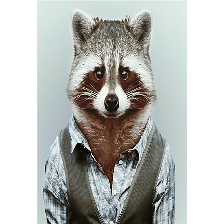

In [20]:
# carico immagine di query + estraggo le sue features
base_dir = "images10_dipinti"
class_test = "raccoon"
img_test = "03.jpg"
query_image = kimage.load_img(f'{base_dir}/{class_test}_{img_test}', target_size=(224, 224, 3))
query_features = resnet_features(query_image, my_resnet)
query_features = np.expand_dims(query_features, axis = 0)
#plot image
query_image

Finds the **10 best results**

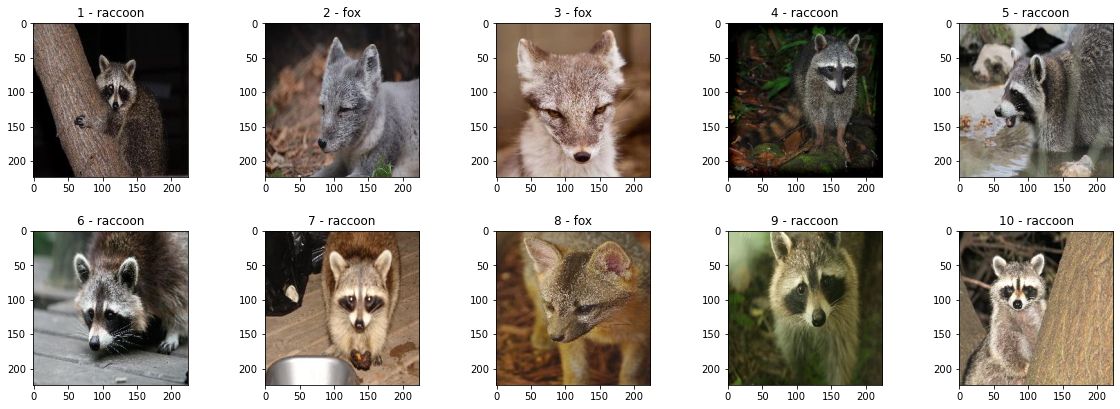

In [21]:
# ricerca nello spazio 
dist, ind = tree.query(query_features, k=10)

# print best 10
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize=(10,7))
for j in range(2):
  for i in range(5):
    path = paths[ind[0][i+j*5]]
    classe = path.split('/')[-2]
    im = kimage.load_img(path, target_size=(224,224,3))
    axs[j][i].imshow(im)
    axs[j][i].set_title(f"{5*j+i+1} - {classe}")
    
plt.subplots_adjust(left = 0.2, right= 1.7, wspace = 0.5)
